# Deep features for image retrieval 

In [5]:
import turicreate

In [6]:
# load CIFAR-10 images
image_data = turicreate.SFrame("~\Washington course\image train\image_train_data")
image_test = turicreate.SFrame("~\Washington course\image test\image_test_data")

#deep_learning_model = turicreate.load_model('imagenet_model_iter45')
#image_data['deep_features'] = deep_learning_model.extract_features(image_data) 

image_data.head(5)

id,image,label,deep_features,image_array
24,Height: 32 Width: 32,bird,"[0.24287176132202148,1.0954537391662598, 0.0, ...","[73.0, 77.0, 58.0, 71.0,68.0, 50.0, 77.0, 69.0, ..."
33,Height: 32 Width: 32,cat,"[0.5250879526138306, 0.0,0.0, 0.0, 0.0, 0.0, ...","[7.0, 5.0, 8.0, 7.0, 5.0,8.0, 5.0, 4.0, 6.0, 7.0, ..."
36,Height: 32 Width: 32,cat,"[0.5660159587860107, 0.0,0.0, 0.0, 0.0, 0.0, ...","[169.0, 122.0, 65.0,131.0, 108.0, 75.0, ..."
70,Height: 32 Width: 32,dog,"[1.129795789718628, 0.0,0.0, 0.7781944870948792, ...","[154.0, 179.0, 152.0,159.0, 183.0, 157.0, ..."
90,Height: 32 Width: 32,bird,"[1.7178692817687988, 0.0,0.0, 0.0, 0.0, 0.0, ...","[216.0, 195.0, 180.0,201.0, 178.0, 160.0, ..."


# Compute summary statistics

In [7]:
image_data['label'].summary()


+------------------+-------+----------+
|       item       | value | is exact |
+------------------+-------+----------+
|      Length      |  2005 |   Yes    |
| # Missing Values |   0   |   Yes    |
| # unique values  |   4   |    No    |
+------------------+-------+----------+

Most frequent items:
+------------+-------+
|   value    | count |
+------------+-------+
|    cat     |  509  |
|    dog     |  509  |
| automobile |  509  |
|    bird    |  478  |
+------------+-------+


# Create category-specific image retrieval models

In [8]:
# Split the training data into 4 different SFrame data structures - one for each of the categories
cat_data = image_data[image_data['label']=='cat']
dog_data = image_data[image_data['label']=='dog']
automobile_data = image_data[image_data['label']=='automobile']
bird_data = image_data[image_data['label']=='bird']

In [9]:
# create a nearest neighbor model using deep features for each category
cat_model = turicreate.nearest_neighbors.create(cat_data, features=['deep_features'], label='id')
dog_model = turicreate.nearest_neighbors.create(dog_data, features=['deep_features'], label='id')
automobile_model = turicreate.nearest_neighbors.create(automobile_data, features=['deep_features'], label='id')
bird_model = turicreate.nearest_neighbors.create(bird_data, features=['deep_features'], label='id')

Starting brute force nearest neighbors model training.

Validating distance components.

Initializing model data.

Initializing distances.

Done.

Starting brute force nearest neighbors model training.

Validating distance components.

Initializing model data.

Initializing distances.

Done.

Starting brute force nearest neighbors model training.

Validating distance components.

Initializing model data.

Initializing distances.

Done.

Starting brute force nearest neighbors model training.

Validating distance components.

Initializing model data.

Initializing distances.

Done.

# Use image retrieval models to find similar images

In [10]:
# find the nearest cat-labeled image in the training data to the cat image that is the first image in the test data

nearest_cats = cat_model.query(image_test[0:1])
nearest_cats

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.196464    | 9.528ms      |

| Done         |         | 100         | 36.009ms     |

+--------------+---------+-------------+--------------+

query_label,reference_label,distance,rank
0,16289,34.62371920804245,1
0,45646,36.00687992842462,2
0,32139,36.52008134363789,3
0,25713,36.754850252057054,4
0,331,36.87312281675268,5


,SArray
0,

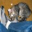

In [11]:
# first image from test data
image_test[0:1]['image'].explore()

,SArray
0,

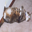

In [12]:
# nearest cat-labeled image in the training data to the cat image that is the first image in the test data is
cat_data.filter_by(16289, 'id')['image'].explore()

In [13]:
# find the nearest dog-labeled image in the training data to the cat image that is the first image in the test data
nearest_dogs = dog_model.query(image_test[0:1])
nearest_dogs

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.196464    | 10.689ms     |

| Done         |         | 100         | 35.557ms     |

+--------------+---------+-------------+--------------+

query_label,reference_label,distance,rank
0,16976,37.464262878423774,1
0,13387,37.56668321685285,2
0,35867,37.60472670789396,3
0,44603,37.70655851529755,4
0,6094,38.511325490739715,5


,SArray
0,

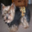

In [14]:
# nearest dog-labeled image in the training data to the cat image that is the first image in the test data
dog_data.filter_by(16976, 'id')['image'].explore()

In [15]:
# mean distance between the first image in the test data and its five nearest neighbors 
# that are labeled ‘cat’ in the training data

nearest_cats['distance'].mean()

36.15573070978294

In [16]:
# mean distance between the first image in the test data and its five nearest neighbors 
# that are labeled ‘dog’ in the training data

nearest_dogs['distance'].mean()

37.77071136184157

# 1 nearest neighbors accuracy

In [17]:
# split the test data on label
image_test_cat = image_test.filter_by('cat', 'label')
image_test_dog = image_test.filter_by('dog', 'label')
image_test_automobile = image_test.filter_by('automobile', 'label')
image_test_bird = image_test.filter_by('bird', 'label')
image_test_bird.head(5)

id,image,label,deep_features,image_array
25,Height: 32 Width: 32,bird,"[0.0,0.31728875637054443, ...","[100.0, 103.0, 74.0,68.0, 91.0, 65.0, 116.0, ..."
35,Height: 32 Width: 32,bird,"[0.7780773639678955, 0.0,0.0, 0.0, 0.0, 0.0, ...","[66.0, 73.0, 84.0, 66.0,71.0, 81.0, 64.0, 67.0, ..."
65,Height: 32 Width: 32,bird,"[0.8887743949890137, 0.0,0.0, 1.2441116571426392, ...","[201.0, 206.0, 166.0,187.0, 180.0, 132.0, ..."
67,Height: 32 Width: 32,bird,"[0.31579452753067017,0.0, 0.0, ...","[76.0, 170.0, 228.0,77.0, 171.0, 225.0, 8 ..."
70,Height: 32 Width: 32,bird,"[1.3413487672805786, 0.0,0.0, 0.0, 0.0, 0.0, ...","[193.0, 181.0, 145.0,181.0, 172.0, 147.0, ..."


In [18]:
# find the closest neighbor to the dog test data using each of the trained models

dog_cat_neighbors = cat_model.query(image_test_dog, k=1) # k=1 finds one neighbor 
dog_dog_neighbors = dog_model.query(image_test_dog, k=1)
dog_automobile_neighbors = automobile_model.query(image_test_dog, k=1)
dog_bird_neighbors = bird_model.query(image_test_dog, k=1)

dog_dog_neighbors

Starting blockwise querying.

max rows per data block: 4348

number of reference data blocks: 8

number of query data blocks: 1

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 1000         | 64000   | 12.5737     | 341.453ms    |

| Done         | 509000  | 100         | 380.958ms    |

+--------------+---------+-------------+--------------+

Starting blockwise querying.

max rows per data block: 4348

number of reference data blocks: 8

number of query data blocks: 1

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 1000         | 64000   | 12.5737     | 316.075ms    |

| Done         | 509000  | 100         | 368.01ms     |

+--------------+---------+-------------+--------------+

Starting blockwise querying.

max rows per data block: 4348

number of reference data blocks: 8

number of query data blocks: 1

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 1000         | 64000   | 12.5737     | 291.297ms    |

| Done         | 509000  | 100         | 349.519ms    |

+--------------+---------+-------------+--------------+

Starting blockwise querying.

max rows per data block: 4348

number of reference data blocks: 8

number of query data blocks: 1

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 1000         | 60000   | 12.5523     | 286.57ms     |

| Done         | 478000  | 100         | 337.355ms    |

+--------------+---------+-------------+--------------+

query_label,reference_label,distance,rank
0,49803,33.47735903726335,1
1,5755,32.84584956840554,1
2,20715,35.03970731890584,1
3,13387,33.90103276968193,1
4,12089,37.484925090925636,1
5,6094,34.94516534398124,1
6,3431,39.095727834463545,1
7,6184,37.76961310322034,1
8,2167,35.10891446032838,1
9,7776,43.242283258453455,1


In [21]:
# Create an SFrame with the distances from the dog test examples 
# to the respective nearest neighbors in each class in the training data

dog_distances = turicreate.SFrame({'dog-dog': dog_dog_neighbors['distance'],
                                  'dog-cat': dog_cat_neighbors['distance'],
                                  'dog-automobile': dog_automobile_neighbors['distance'],
                                  'dog-bird': dog_bird_neighbors['distance']})
dog_distances.head(5)

dog-automobile,dog-bird,dog-cat,dog-dog
41.95797614571203,41.75386473035126,36.419607706754384,33.47735903726335
46.00213318067788,41.3382958924861,38.83532688735542,32.84584956840554
42.946229069238804,38.615759085289056,36.97634108541546,35.03970731890584
41.68660600484793,37.08922699538214,34.575007291446106,33.90103276968193
39.22696649347584,38.27228869398105,34.77882479101661,37.484925090925636


In [25]:
# compute the number of dog test examples where the distance to the nearest dog image was lower 
# than that to the other image classes
def is_dog_correct(row):
    if (row['dog-dog']<row['dog-cat']) and (row['dog-dog']<row['dog-automobile']) and (row['dog-dog']<row['dog-bird']):
        return 1
    return 0

dog_distances['correct_prediction'] = dog_distances.apply(is_dog_correct)

nbumber_of_correct_dog_predictions = dog_distances['correct_prediction'].sum()
nbumber_of_correct_dog_predictions   

678

In [26]:
dog_accuracy = nbumber_of_correct_dog_predictions/len(dog_distances)
dog_accuracy

0.678